# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Weather Observable Trends


Tred 1: The strongest correlation appears to be a cities maximum temperature in relation to its proximity to the equator. With cities located closest to the equator experiencing a higher maximum temperature. 

Tred 2: Latitude does not appear to be a good predictor of wind speed or cloudiness as neither of these factors had a strong correlation linked to latitude. 

Trend 3: The Southern Hemisphere had a slightly lower maximum temperature compared to the northern hemisphere and also had a stronger correlational relationship between between max temp and latitude. Showing a stronger relationship than even the Norther Hemisphere between temperature increase and proximity to the equator. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import date class from datetime module
from datetime import date
# Returns the current local date
today = date.today()

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url= f"{url}appid={weather_api_key}&units={units}&q="
#print(query_url)

response = requests.get(query_url + city).json()
response
# data = response.json()
# data
#print(json.dumps(data, indent=4))
    

{'coord': {'lon': -159.319, 'lat': 22.0752},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 76.59,
  'feels_like': 77.61,
  'temp_min': 71.58,
  'temp_max': 79.12,
  'pressure': 1019,
  'humidity': 78},
 'visibility': 10000,
 'wind': {'speed': 4, 'deg': 354, 'gust': 10},
 'clouds': {'all': 75},
 'dt': 1628083096,
 'sys': {'type': 2,
  'id': 2001562,
  'country': 'US',
  'sunrise': 1628093455,
  'sunset': 1628140542},
 'timezone': -36000,
 'id': 5848280,
 'name': 'Kapaa',
 'cod': 200}

In [4]:
#Empty lists to append to 
city_name=[]
cloudiness_list=[]
country_list=[]
date_list=[]
humidity_list=[]
lat_list=[]
lng_list=[]
max_temp_list=[]
wind_speed_list=[]
index_count= 0
set_count= 1

#city_num = 1
print("Beginning Data Retrieval")
print("-------------------------------")

for index, city in enumerate(cities, start =1):
    try:
        response= requests.get(query_url + city).json()
        city_name.append(response['name'])
        cloudiness_list.append(response['clouds']["all"])
        country_list.append(response['sys']['country'])
        date_list.append(response['dt'])
        humidity_list.append(response["main"]['humidity'])
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        max_temp_list.append(response["main"]['temp_max'])
        wind_speed_list.append(response['wind']['speed'])
        
        #city_found = response["name"]
        #city_num = city_num + 1
        if index_count >49:
            index_count = 1
            set_count = set_count + 1
            
        else:
            index_count = index_count + 1
            
        print(f"Processing Record {index_count} of Set {set_count} | {city}")
        
    except:
        print("City not found. Skipping... ")
        
print("-----------------------------")
print("Data Retrieval Complete")     
print("-----------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | antalaha
Processing Record 4 of Set 1 | olafsvik
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | willowmore
Processing Record 7 of Set 1 | taltal
Processing Record 8 of Set 1 | port macquarie
Processing Record 9 of Set 1 | naze
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | mawlaik
Processing Record 13 of Set 1 | cape town
City not found. Skipping... 
Processing Record 14 of Set 1 | talant
City not found. Skipping... 
Processing Record 15 of Set 1 | eugene
Processing Record 16 of Set 1 | tuatapere
Processing Record 17 of Set 1 | sisimiut
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | terrace
Processing Record 20 of Set 1 | hamilton
Processing Record 21 of Set 1 | aden
Processing Record 22 of Set 1 | arraial do

Processing Record 37 of Set 4 | manaure
Processing Record 38 of Set 4 | saint-philippe
Processing Record 39 of Set 4 | chicama
Processing Record 40 of Set 4 | muli
Processing Record 41 of Set 4 | manicore
Processing Record 42 of Set 4 | queimadas
Processing Record 43 of Set 4 | baker city
Processing Record 44 of Set 4 | rafsanjan
Processing Record 45 of Set 4 | mersing
Processing Record 46 of Set 4 | gigmoto
Processing Record 47 of Set 4 | hasaki
City not found. Skipping... 
Processing Record 48 of Set 4 | narsaq
Processing Record 49 of Set 4 | vilcun
Processing Record 50 of Set 4 | mount isa
Processing Record 1 of Set 5 | beringovskiy
Processing Record 2 of Set 5 | guarapari
Processing Record 3 of Set 5 | cidreira
Processing Record 4 of Set 5 | strezhevoy
Processing Record 5 of Set 5 | sandusky
Processing Record 6 of Set 5 | hualmay
Processing Record 7 of Set 5 | pangnirtung
Processing Record 8 of Set 5 | port elizabeth
Processing Record 9 of Set 5 | cayenne
Processing Record 10 of Se

Processing Record 26 of Set 8 | lasa
Processing Record 27 of Set 8 | sitka
Processing Record 28 of Set 8 | stornoway
Processing Record 29 of Set 8 | whitehorse
Processing Record 30 of Set 8 | nantucket
Processing Record 31 of Set 8 | zuidhorn
Processing Record 32 of Set 8 | ashland
Processing Record 33 of Set 8 | payo
Processing Record 34 of Set 8 | otradnoye
Processing Record 35 of Set 8 | upernavik
Processing Record 36 of Set 8 | sharan
Processing Record 37 of Set 8 | sibolga
Processing Record 38 of Set 8 | padang
Processing Record 39 of Set 8 | smithers
Processing Record 40 of Set 8 | batemans bay
Processing Record 41 of Set 8 | harper
Processing Record 42 of Set 8 | slave lake
City not found. Skipping... 
Processing Record 43 of Set 8 | takapau
Processing Record 44 of Set 8 | upata
Processing Record 45 of Set 8 | pangai
Processing Record 46 of Set 8 | westport
Processing Record 47 of Set 8 | pau dos ferros
Processing Record 48 of Set 8 | mayahi
Processing Record 49 of Set 8 | baher

Processing Record 13 of Set 12 | sokoto
Processing Record 14 of Set 12 | himare
Processing Record 15 of Set 12 | zhangye
Processing Record 16 of Set 12 | mongagua
Processing Record 17 of Set 12 | cuorgne
Processing Record 18 of Set 12 | syumsi
Processing Record 19 of Set 12 | suure-jaani
Processing Record 20 of Set 12 | morro bay
City not found. Skipping... 
Processing Record 21 of Set 12 | ostrow mazowiecka
City not found. Skipping... 
Processing Record 22 of Set 12 | zemio
Processing Record 23 of Set 12 | sur
Processing Record 24 of Set 12 | timmins
Processing Record 25 of Set 12 | vanimo
Processing Record 26 of Set 12 | contamana
Processing Record 27 of Set 12 | balezino
Processing Record 28 of Set 12 | mazatan
Processing Record 29 of Set 12 | broome
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df=pd.DataFrame({
    "City":city_name,
    "Lat":lat_list,
    "Lng":lng_list,
    "Max Temp":max_temp_list,
    "Humidity":humidity_list,
    "Cloudiness":cloudiness_list,
    "Wind Speed":wind_speed_list,
    "Country":country_list,
    "Date":date_list,
})

weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,69.53,94,90,8.05,US,1628082976
1,Port Alfred,-33.5906,26.8910,67.93,72,41,14.65,ZA,1628082977
2,Antalaha,-14.9003,50.2788,75.16,62,0,13.33,MG,1628083097
3,Olafsvik,64.8945,-23.7142,53.35,92,100,8.12,IS,1628082950
4,Punta Arenas,-53.1500,-70.9167,46.51,66,0,23.02,CL,1628083097
...,...,...,...,...,...,...,...,...,...
574,Vanimo,-2.6741,141.3028,79.07,83,100,3.00,PG,1628083279
575,Contamana,-7.3333,-75.0167,72.12,55,5,2.82,PE,1628083279
576,Balezino,57.9796,53.0106,78.04,67,100,9.13,RU,1628083279
577,Mazatán,14.8667,-92.4500,77.07,100,40,4.61,MX,1628083279


In [6]:
weather_df.to_csv("../output_data/weather_df.csv", index=False, header=True)

In [7]:
#Looking at DataFrame to see if have 100% humidity
weather_stats_df=pd.DataFrame({
    "City":city_name,
    "Lat":lat_list,
    "Lng":lng_list,
    "Max Temp":max_temp_list,
    "Humidity":humidity_list,
    "Cloudiness":cloudiness_list,
    "Wind Speed":wind_speed_list,
    "Country":country_list,
    "Date":date_list,
})

weather_stats_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,19.754801,20.524996,71.154784,68.521589,54.832470,7.672660,1.628083e+09
std,33.316688,89.143338,14.785844,22.637220,40.180233,5.686849,9.149001e+01
min,-54.800000,-175.200000,32.610000,6.000000,0.000000,0.000000,1.628083e+09
25%,-7.887650,-57.677250,61.410000,56.000000,9.000000,3.440000,1.628083e+09
50%,23.633300,23.489500,72.970000,73.000000,66.000000,6.490000,1.628083e+09
75%,47.633250,98.981800,81.255000,85.500000,97.000000,10.745000,1.628083e+09
max,78.218600,179.316700,117.120000,100.000000,100.000000,31.920000,1.628083e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

The above Data Frame indicates that there are not any cities with over 100% humidity, skipping this section. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [8]:
#using the imported datatime to dynamically code date into title fields, below it to place it in Month,Daty,Year format
date= today.strftime("%m/%d/%Y")
date

'08/04/2021'

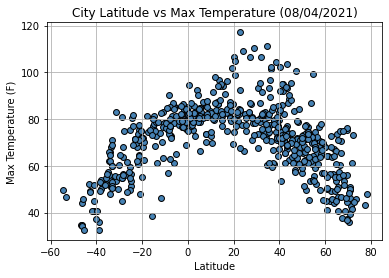

In [9]:
#weather_df.plot(kind="scatter", x= "Lat", y="Max Temp", marker="o", edgecolors="black", size="200")
plt.scatter(lat_list, max_temp_list, c ="steelblue",
            linewidths = 1,
            marker ="o", 
            edgecolor ="black", 
            s = 35)
plt.title(f"City Latitude vs Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("../Images/City Latitude vs Max Temperature.png")
plt.show()

The City Latitude vs Max Temperature scatter plt visually indicates that cities located closer to the equater experience higher temperatures. There plot does visually appear to have a slight concentration of higher temperatures located just above the equator. 

## Latitude vs. Humidity Plot

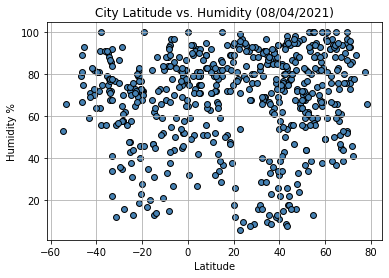

In [10]:
plt.scatter(lat_list, humidity_list, c="steelblue",
           linewidth = 1,
           marker = "o",
           edgecolor = "black",
           s = 35)
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()
plt.savefig("../Images/City Latitude vs Humidity.png")
plt.show()

The City Latitude vs Humididty scatter plot does not appear to show a strong correlation between the level of humidity a city experiences in relation to it latitude. 

## Latitude vs. Cloudiness Plot

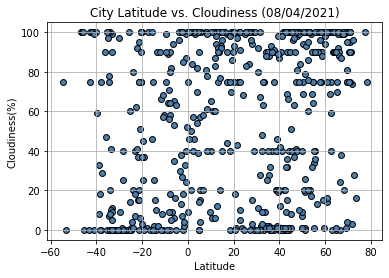

In [11]:
plt.scatter(lat_list, cloudiness_list, c="steelblue",
           linewidth= 1,
           marker = "o",
           edgecolor = "black",
           s = 35)
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()
plt.savefig("../Images/City Latitude vs Cloudiness.png")
plt.show()

The City Latitude vs. Cloudiness plot does not appear to have a stron correlation but there does appear to possibly be a small cluster of cloudier cities located higher on the equator lilne. 

## Latitude vs. Wind Speed Plot

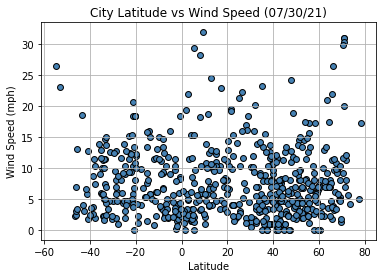

In [12]:
plt.scatter(lat_list, wind_speed_list, c="steelblue",
           linewidth= 1,
           marker = "o",
           edgecolor = "black",
           s =35)
plt.title(f"City Latitude vs Wind Speed (07/30/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../Images/City Latitude vs Wind Speed.png")
plt.show()

The City Latitude vs Wind Speed plot does not appear to have a scrong correlation either. However, there do appear to be a few more data points further from the equator with a higher wind speed indicating that it is possible that locations further from the euqator experience more wind. 

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [13]:
north= weather_df.loc[weather_df['Lat'] >=0]
south= weather_df.loc[weather_df['Lat'] <=0]

In [14]:
def regressline(x_values, y_values, ylabel, text_cord):
    (slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    #plot scatter plot
    plt.scatter(x_values, y_values)
    #plot regression line
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_cord , fontsize =15, color="red")
    #label plot
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    #print r square value
    print(f"The r-value is: {rvalue**2}")

    #show plot
#     plt.show()

 #### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4364379582092655


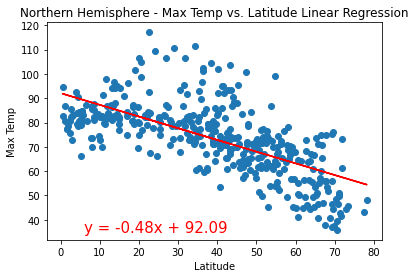

In [23]:
x_values= north["Lat"].astype('float')
y_values= north["Max Temp"].astype('float')
regressline(x_values, y_values, "Max Temp", (6,35))
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

There appears to be a statistically significant correlation between between maximum temperature and latitude, with the graph displaying a negative r value indicating that the further from the equator while in the northern hemisphere the lower the maximium temperature reached. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6322631906769745


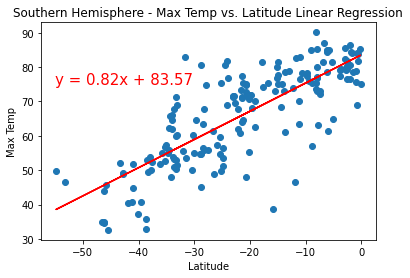

In [24]:
x_values= south["Lat"].astype('float')
y_values= south["Max Temp"].astype('float')
regressline(x_values, y_values, "Max Temp", (-55,75))
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

The southern hemisphere regression line has a slightly stronger correlation than the norther, and indicates with positive r value that the closer to the to the equator a city is the higher max temperature that is reached for the city. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0024017924106943807


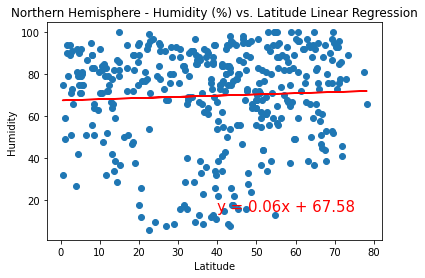

In [25]:
x_values= north["Lat"].astype('float')
y_values= north["Humidity"].astype('float')
regressline(x_values, y_values, "Humidity", (40,15))
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

The Norther Hemisphere  Humidity vs Latitude Linear Regression plot has a failry flat r-value, indicating that there does not appear to be a significant correlation between humidity and latitude for a city. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0031341569020869654


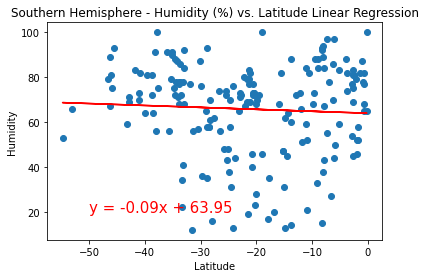

In [26]:
x_values= south["Lat"].astype('float')
y_values= south["Humidity"].astype('float')
regressline(x_values, y_values, "Humidity", (-50,20))
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

The Southern Hemisphere Humidity vs Latitude Linear Regression plot has a very weak correlation, indicating that there does not appear to be a significant correlation between humidity and latitude for a Southern Hemisphere city. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0007273313650626327


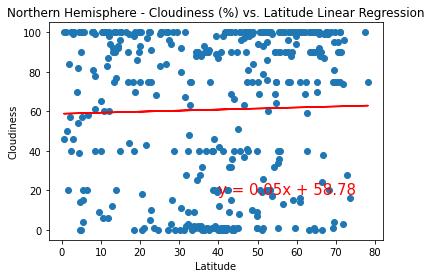

In [27]:
x_values= north["Lat"].astype('float')
y_values= north["Cloudiness"].astype('float')
regressline(x_values, y_values, "Cloudiness", (40,18))
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

The N. Hemisphere Cloudiness vs Latitude plot once again is showing a very weak negative correlation. Indicating that there is not much of a significance between a cities latitude in the Northern Hemisphere vs its cloudiness. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.001103530075119476


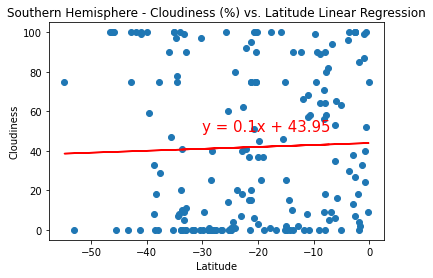

In [28]:
x_values= south["Lat"].astype('float')
y_values= south["Cloudiness"].astype('float')
regressline(x_values, y_values, "Cloudiness", (-30,50))
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

The Southern Hemisphere Cloudiness vs Latitude Linear Regression shows that there appears to be a possilbe correlation 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.00021757775291101586


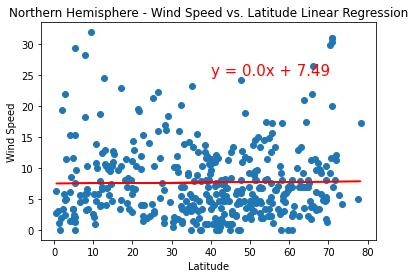

In [29]:
x_values= north["Lat"].astype('float')
y_values= north["Wind Speed"].astype('float')
regressline(x_values, y_values, "Wind Speed", (40,25))
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
plt.show()

The above plot and regression line shows a weak negative correlation between wind speed and latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.018357397502600726


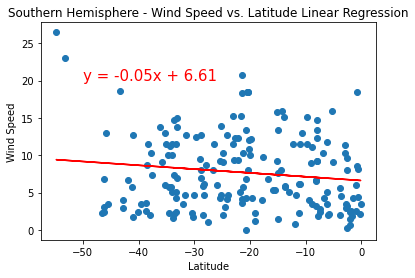

In [30]:
x_values= south["Lat"].astype('float')
y_values= south["Wind Speed"].astype('float')
regressline(x_values, y_values, "Wind Speed", (-50,20))
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
plt.show()

The above plot and regression line shows a weak negative correlation between wind speed and latitude.